# <center> $\underline{\textbf{AAG05 - Regressão e Predição}}$ <p><center> Flávio Motta

## $\textbf{1. Contexto}$

Em um período foi observado tanto a frequência em aula quanto a nota final de 17 alunos. Com os dados, podemos analisar a distribuição correspondente.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import statsmodels.api as sm
import pylab

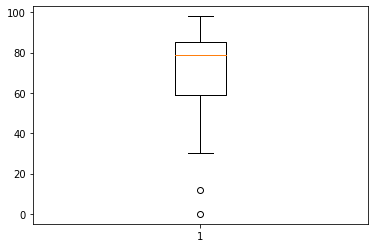

In [3]:
plt.boxplot(eixoY)
plt.show()
#eixoY =[0,12,30,54,59,72,63,71,79,82,80,85,82,88,92,95,98]

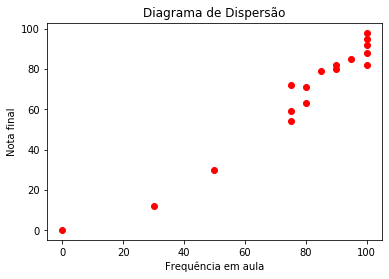

In [2]:
eixoX = [0,30,50,75,75,75,80,80,85,90,90,95,100,100,100,100,100] #Os dados nesse vetor representam a frequencia em aula
eixoY =[0,12,30,54,59,72,63,71,79,82,80,85,82,88,92,95,98] #Os dados nesse vetor representam as notas dos alunos
#eixoX = [1,2,3,2,1,3]
#eixoY = [3,5,8,9,4,7]
n = len(eixoX)
plt.title('Diagrama de Dispersão')
plt.xlabel('Frequência em aula')
plt.ylabel('Nota final')
plt.plot(eixoX, eixoY,'ro')

Podemos então calcular o coeficiente de correlação para a amostra bivariada.

In [4]:
xy = [eixoX,eixoY]
print(np.corrcoef(xy))
print(n)

[[1.         0.97321796]
 [0.97321796 1.        ]]
17


O coeficiente de correlação dos dados coletados é consideravelmente forte (acima de 0,8), dessa forma seguimos com os a amostra escolhida.

## $\textbf{2. Calculando alguns parâmetros utilizados}$

In [5]:
mediaX = sum(eixoX)/n
mediaY = sum(eixoY)/n
print('Média de x:',mediaX,'\nMédia de y:',mediaY)

somatorioProduto = 0
somatorioQuadradoX = 0
for indice in range(n):
    somatorioProduto += eixoX[indice] * eixoY[indice]
    somatorioQuadradoX += pow(eixoX[indice],2)
print('Somatorio dos produtos:', somatorioProduto)
print('Somatorio dos quadrados de x:', somatorioQuadradoX)

b1 = (somatorioProduto-(n*mediaX*mediaY)) / (somatorioQuadradoX-(n*pow(mediaX,2)))
b0 = (mediaY - (b1*mediaX))
print('b1: ',b1)
print('b0: ',b0)

Média de x: 77.94117647058823 
Média de y: 67.17647058823529
Somatorio dos produtos: 101325
Somatorio dos quadrados de x: 115525
b1:  1.0051608257321174
b0:  -11.166946711473855


Com os parâmetros b0 e b1 estimados, podemos plotar a reta que representa a equação 
$\begin{equation}
y_i = B_0 + B_1 X_i
\end{equation}$

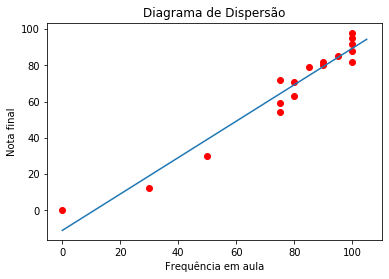

In [6]:
x = np.linspace(0, 105) 
y = b0 + b1 * x  

plt.title('Diagrama de Dispersão')
plt.xlabel('Frequência em aula')
plt.ylabel('Nota final')
plt.plot(eixoX, eixoY,'ro',x, y) 
plt.show() 

#### Comentário
Visualmente considero que a reta determinada pelos parâmetros divide bem os valores plotados. Pode-se perceber que os alunos com menor frequencia em aula diferem um pouco mais da reta proposta pela regressão. Por ter maior número de alunos com frequencia maior, a reta acaba representando melhor os dados na região que eles se encontram.

In [7]:
somatorioQuadradoY, somatorioY = 0 , 0
nyQuadrado = n*pow(mediaY,2)
nxQuadrado = n*pow(mediaX,2)
for indice in range(n):
    somatorioY += eixoY[indice]
    somatorioQuadradoY += pow(eixoY[indice],2)
SSE = somatorioQuadradoY-(b0*somatorioY)- (b1*somatorioProduto)
SST = somatorioQuadradoY - nyQuadrado
SSR = SST - SSE
print('Coeficiente de determinação:',SSR/SST)

Coeficiente de determinação: 0.9471532051938456


#### Comentário
Considerando que o coeficiente de determinação é um valor que varia de 0 a 1, o calculado na amostra utilizada é relativamente alto (Quanto maior melhor a regressão), dessa forma podemos afirmar que o modelo explica quase 95% da variação (muito bom).

### $\textbf{Desvio padrão dos erros e dos parâmetros}$

In [8]:
QME = SSE/(n-2)
Se = math.sqrt(QME)
print('Desvio padrão dos erros:',Se)

Desvio padrão dos erros: 6.785928957268104


#### Comentário
O desvio padrão dos erros não foi o mais baixo, isso se deve ao fato de os alunos com menor frequência se distanciarem mais da reta calculada. A reta dada pela regressão distancia-se mais devido ao maior número de alunos com frequencia pouco abaixo de 100% obterem notas finais parecidas.

In [9]:
Sb0 = Se * math.sqrt(1/n+(pow(mediaX,2)/(somatorioQuadradoX - nxQuadrado)))
Sb1 = Se / (somatorioQuadradoX-nxQuadrado)
print('Desvio padrão de b0:', Sb0)
print('Desvio padrão de b1:', Sb1)

Desvio padrão de b0: 5.053620926673252
Desvio padrão de b1: 0.000553820414179346


#### Comentário
O desvio padrão dos parâmetros mostra a diferença que cada um compôs na reta escolhida. b0 tem um desvio padrão relativamente mais alto que b1, o que mostra seu peso maior.

### $\textbf{Intervalo de confiança dos parâmetros}$

Nível de confiança de 90%

In [10]:
valorTabelaT = 1.7531 #Valor recuperado na tabela para nivel de confianca de 90% em amostra de 17-2
IntervaloPb0 = b0 +  valorTabelaT* Sb0
IntervaloNb0 = b0 -  valorTabelaT* Sb0
print(IntervaloPb0, '\n', IntervaloNb0)
IntervaloPb1 = b1 +  valorTabelaT * Sb1
IntervaloNb1 = b1 -  valorTabelaT * Sb1
print(IntervaloPb1, '\n', IntervaloNb1)

-2.307443864922975 
 -20.026449558024737
1.0061317283002151 
 1.0041899231640197


<p>Em ambas variáveis o intervalo não inclui o 0, no caso de b1 o desvio padrão do mesmo é muito baixo, o que dificulta bem que isso aconteça. Já b0 tem um desvio padrão alto, no caso do nível em 90% ainda não foi possível concluir que não são diferentes.
<p>95%

In [11]:
valorTabelaT = 2.1314
IntervaloPb0 = b0 +  valorTabelaT* Sb0
IntervaloNb0 = b0 -  valorTabelaT* Sb0
print(IntervaloPb0, '\n', IntervaloNb0)
IntervaloPb1 = b1 +  valorTabelaT * Sb1
IntervaloNb1 = b1 -  valorTabelaT * Sb1
print(IntervaloPb1, '\n', IntervaloNb1)

-0.3956590683624839 
 -21.938234354585227
1.0063412385628994 
 1.0039804129013354


<p>A conclusão de 90% se repete: em ambas variáveis o intervalo não inclui o 0, no caso de b1 o desvio padrão do mesmo é muito baixo, o que dificulta bem que isso aconteça. Já b0 tem um desvio padrão alto, no caso do nível em 95% ainda não foi possível concluir que não são diferentes.
<p>99%

In [12]:
valorTabelaT = 2.9467
IntervaloPb0 = b0 +  valorTabelaT* Sb0
IntervaloNb0 = b0 -  valorTabelaT* Sb0
print(IntervaloPb0, '\n', IntervaloNb0)
IntervaloPb1 = b1 +  valorTabelaT * Sb1
IntervaloNb1 = b1 -  valorTabelaT * Sb1
print(IntervaloPb1, '\n', IntervaloNb1)

3.724558073154217 
 -26.058451496101927
1.0067927683465796 
 1.0035288831176552


<p>Como o intervalo de confiancia inclui o 0, a hipótese de que o parametro é zero não pode ser rejeitada com uma significância de 99%.
<p>Como o intervalo não inclui o zero, b1 é significativamente diferente de 0 nesse nível de confiança

[ 0 12 30 54 59 72 63 71 79 82 80 85 82 88 92 95 98]


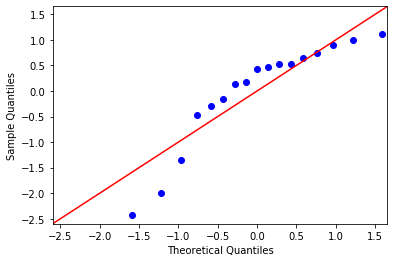

In [13]:
arr = np.array(eixoY)
print(arr)
sm.qqplot(arr ,line='45',fit=True)
pylab.show()

<p>Podemos ver o gráfico q-q para as notas finais dos alunos na disciplina.
<p>Como a amostra é pequena e poucos alunos tem nota relativamente baixa, poucos iniciais ficaram distribuidos abaixo da linha, a maior parte dos alunos seguiram acima e perto da linha.
<p> Pelos primeiros alunos apresentarem uma frequencia relativamente baixa esses pontos ficam bem abaixo da reta, apresentando pouco peso para a regressão e um erro maior. Boa parte dos alunos apresentam pouco menos que 100% de presença, esses alunos tem um erro menor e determinam mais a reta traçada.

### Calculando desvio padrão dos erros individualmente

In [14]:
erro = []
estimado =[]
for indice in range(len(eixoX)):
    valorDeXNaRegressao = b0 + b1 * xy[0][indice] #Valor da minha regressão no ponto x
    estimado.append(valorDeXNaRegressao)
    erro.append(xy[1][indice] - valorDeXNaRegressao)
print('Valor estimado pela regressão:',estimado)
print('Erro da regressão:',erro)

Valor estimado pela regressão: [-11.166946711473855, 18.987878060489667, 39.09109457513202, 64.22011521843496, 64.22011521843496, 64.22011521843496, 69.24591934709554, 69.24591934709554, 74.27172347575612, 79.29752760441671, 79.29752760441671, 84.3233317330773, 89.34913586173789, 89.34913586173789, 89.34913586173789, 89.34913586173789, 89.34913586173789]
Erro da regressão: [11.166946711473855, -6.987878060489667, -9.091094575132018, -10.220115218434955, -5.220115218434955, 7.779884781565045, -6.245919347095537, 1.754080652904463, 4.728276524243881, 2.7024723955832854, 0.7024723955832854, 0.6766682669227038, -7.349135861737892, -1.3491358617378921, 2.650864138262108, 5.650864138262108, 8.650864138262108]


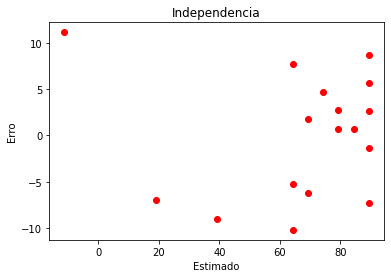

In [18]:
plt.title('Independencia')
plt.xlabel('Estimado')
plt.ylabel('Erro')
plt.plot(estimado, erro,'ro')

Apesar de um erro bem alto inicial (acima de 11), acredito que os demais erros são bem distribuidos e não apresentam tendência de espalhamento posteriormente.

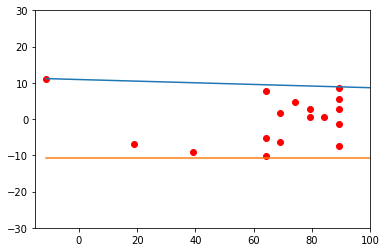

In [46]:
plt.xlim(-15,100)
plt.ylim(-30,30)
#x = np.linspace(11, 11,num=100) 
x = [-11.2,100]
y = [11.166946711473855,8.66]
x1 = [-11.2,100]
y1 = [-10.8,-10.8]
plt.plot(estimado, erro,'ro',x,y,x1,y1)

Alterando a escala da para ver melhor que o gráfico não apresenta tendência de espalhamento. Tracei duas retas para ficar mais facil de enxergar a homocedasticidade, no caso determinei a reta superior como o primeiro ponto em x e o ponto mais alto do fim de x.
Na reta inferior determinei como sendo apenas uma reta sem variação, delimitada pouco abaixo do ponto mais baixo em y